<ipython-input-24-892053e82449>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='total_trips', data=peak_hours_df, palette='viridis')


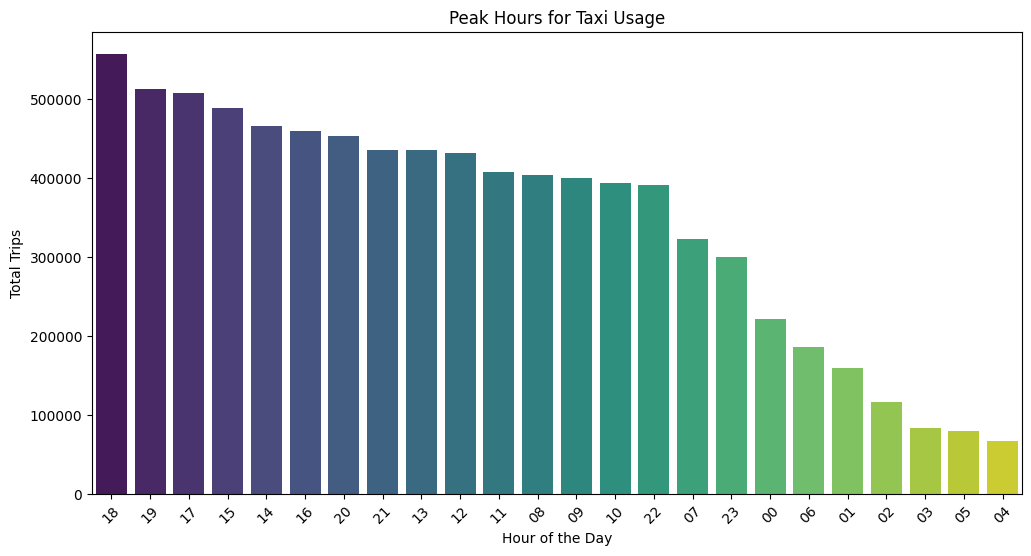

<ipython-input-24-892053e82449>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='average_fare', data=passenger_fare_df, palette='coolwarm')


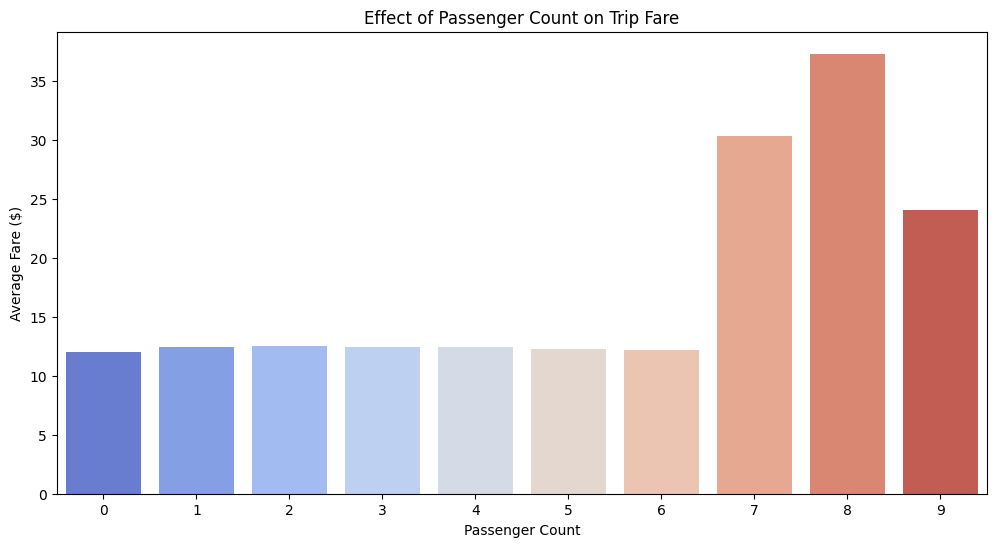

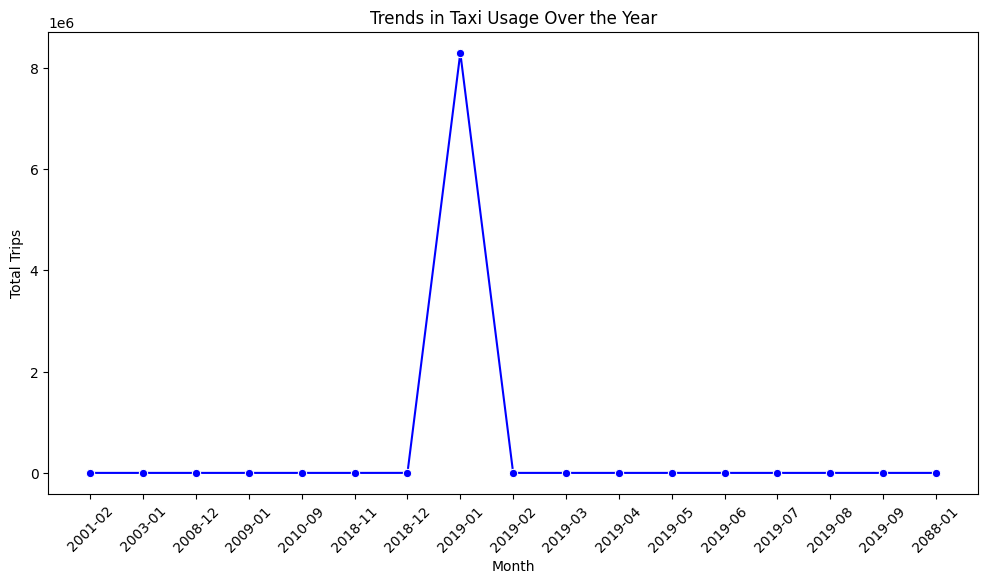

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
db_file = "nyc_taxi_data_2019.db"
conn = sqlite3.connect(db_file)

# SQL Query 1: Peak hours for taxi usage
peak_hours_query = """
SELECT strftime('%H', pickup_datetime) AS hour, COUNT(*) AS total_trips
FROM Trips
GROUP BY hour
ORDER BY total_trips DESC
"""
peak_hours_df = pd.read_sql_query(peak_hours_query, conn)

# SQL Query 2: Passenger count effect on trip fare (assuming passenger_count column exists)
passenger_fare_query = """
SELECT passenger_count, AVG(fare_amount) AS average_fare
FROM Trips
GROUP BY passenger_count
ORDER BY passenger_count
"""
passenger_fare_df = pd.read_sql_query(passenger_fare_query, conn) # Uncomment this line to execute the query

# SQL Query 3: Trends in usage over the year
usage_trends_query = """
SELECT strftime('%Y-%m', pickup_datetime) AS month, COUNT(*) AS total_trips
FROM Trips
GROUP BY month
ORDER BY month
"""
usage_trends_df = pd.read_sql_query(usage_trends_query, conn)

# Close the connection
conn.close()

# Plot 1: Peak hours for taxi usage
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='total_trips', data=peak_hours_df, palette='viridis')
plt.title('Peak Hours for Taxi Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Passenger count effect on trip fare
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_count', y='average_fare', data=passenger_fare_df, palette='coolwarm')
plt.title('Effect of Passenger Count on Trip Fare')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare ($)')
plt.show()

# Plot 3: Trends in usage over the year
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='total_trips', data=usage_trends_df, marker='o', color='b')
plt.title('Trends in Taxi Usage Over the Year')
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.show()